# Method of [Lavor](http://onlinelibrary.wiley.com/doi/10.1002/qua.10701/full) for determining the global minimum of a multidimensional scalar function

Consider the following multidimensional function

$$F: \mathbb{R}^2 \rightarrow \mathbb{R} \, ,$$

$$F(x_1,x_2) = \sum_{i=1}^2 (1 + \cos(3 x_i)) + \sum_{i=1}^2 \left( \dfrac{(-1)^i}{\sqrt{10.60099896 - 4.141720682 \cos(x_i)}} \right) \, , $$

whose global minimum is wanted. This function may represent the potential surface energy of a molecule in a simplified model.

The method of Lavor departs from the natural inclusion function, defined as

$$[F] : \mathbb{I} \mathbb{R}^2 \rightarrow \mathbb{I} \mathbb{R} \, , $$

substituing the variables  $x_i$ by intervals $X_i$. The method also considers the gradient function. This allows to detect if a given box may contain the global minimum. For $F$, Lavor computes (by hand) the gradient of the function: $g_i = \partial F/ \partial x_i$ (we plan in the future to use **ForwardDiff.jl**). He obtains

$$ g_i(X_i) = -3 \sin(3 X_i) + \dfrac{(-1)^{i+1} 2.070860341 \sin(X_i)}{(\sqrt{10.60099896 - 4.141720682 \cos(X_i))}^3} $$

The method needs an initial search space. We will consider this

$$ S = S_1 \times S_2 = [0,5] \times [0,5] \, .$$

A graph of the surface is displayed below

In [1]:
using PyPlot

INFO: Recompiling stale cache file /home/diegotap/.julia/lib/v0.6/PyPlot.ji for module PyPlot.
  likely near /home/diegotap/.julia/v0.6/PyPlot/src/PyPlot.jl:348
  likely near In[1]:1


In [2]:
include("lavoralgorithm.jl")

INFO: Recompiling stale cache file /home/diegotap/.julia/lib/v0.6/IntervalArithmetic.ji for module IntervalArithmetic.
INFO: Recompiling stale cache file /home/diegotap/.julia/lib/v0.6/IntervalRootFinding.ji for module IntervalRootFinding.
INFO: Recompiling stale cache file /home/diegotap/.julia/lib/v0.6/Distributions.ji for module Distributions.


minimize (generic function with 1 method)

In [3]:
## Specific function that Lavor considers (f and its gradient)

function flavor(xx::IntervalBox)
    x1,x2 = xx.data
    f1(x) = 1. + cos(3*x)
    f2(x) = 1./(sqrt(10.60099896  - 4.141720682*cos(x)))
    f1(x1) + f1(x2) - f2(x1) + f2(x2)
end 

function flavor(xx::Array{Float64})
    x, y = xx
    f1(a) = 1. + cos(3*a)
    f2(a) = 1./(sqrt(10.60099896  - 4.141720682*cos(a)))
    f1(x) + f1(y) - f2(x) + f2(y)
end 

function glavor(xx::IntervalBox)
    x1,x2 = xx.data
    g1(x) = -3.*sin(3*x)
    g2(x) = 2.070860341*sin(x)/(sqrt(10.60099896  - 4.141720682*cos(x)))^3
    [g1(x1) + g2(x1), g1(x2) - g2(x2)]
end 

glavor (generic function with 1 method)

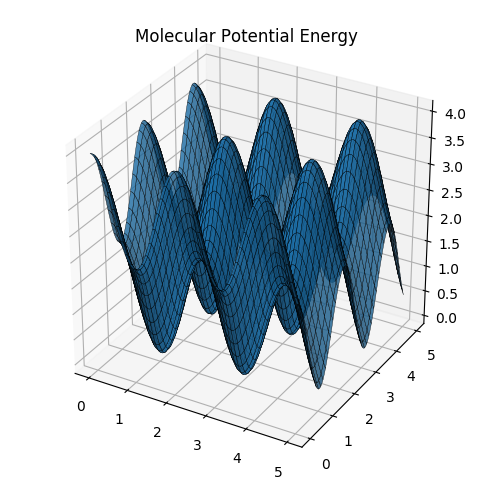

In [4]:
## Plot
n = 100
x = linspace(0, 5, n)
y = linspace(0, 5, n)
xgrid = repmat(x', n, 1 )
ygrid = repmat(y, 1, n )
X = [xgrid[:] ygrid[:]]'
z = [flavor(X[:,i]) for i in 1:size(X, 2)]
zgrid = reshape(z, n, n)
figure("Surface plot", figsize=(6,6))
plot_surface(xgrid, ygrid, zgrid,
                rstride=2,edgecolors="k", 
                cstride=2, alpha=0.8, linewidth=0.25)
title("Molecular Potential Energy");

In [5]:
tol = 0.005
X = IntervalBox(0..5,0..5)  ## Search space
@time boxes, global_m = minimize(X, flavor, glavor, tolerance = tol); 

  1.341665 seconds (536.12 k allocations: 29.014 MiB, 0.57% gc time)


In [6]:
global_m #Valor reportado: -0.082224

-0.0822300975146642

In [7]:
boxes

1-element Array{IntervalArithmetic.IntervalBox{2,Float64},1}:
 [1.03515, 1.04004] × [3.13964, 3.14454]

In [8]:
##Comparison with IntervalOptimisation.jl

In [9]:
using IntervalOptimisation


Use "SortedVector{T,F}(...) where {T,F}" instead.


In [10]:
@time global_min, minimisers = minimise( X -> ( (x,y) = X; 1. + cos(3*x)  - 1./(sqrt(10.60099896  - 4.141720682*cos(x))) 
        + 1. + cos(3*y) + 1./(sqrt(10.60099896  - 4.141720682*cos(y)))), (-5..5)  × (-5..5), tol);

  0.459425 seconds (228.50 k allocations: 11.272 MiB, 1.79% gc time)


In [11]:
global_min

[-0.0825851, -0.082224]

In [12]:
minimisers

60-element Array{IntervalArithmetic.IntervalBox{2,Float64},1}:
 [1.03515, 1.04004] × [3.13964, 3.14454]    
 [1.03515, 1.04004] × [-3.14454, -3.13964]  
 [-1.04004, -1.03515] × [3.13964, 3.14454]  
 [-1.04004, -1.03515] × [-3.14454, -3.13964]
 [-1.04004, -1.03515] × [-3.13965, -3.13476]
 [-1.04004, -1.03515] × [3.13476, 3.13965]  
 [1.03515, 1.04004] × [-3.13965, -3.13476]  
 [1.03515, 1.04004] × [3.13476, 3.13965]    
 [-1.04004, -1.03515] × [-3.14942, -3.14453]
 [-1.04004, -1.03515] × [3.14453, 3.14942]  
 [1.03515, 1.04004] × [-3.14942, -3.14453]  
 [1.03515, 1.04004] × [3.14453, 3.14942]    
 [1.03027, 1.03516] × [3.13964, 3.14454]    
 ⋮                                          
 [1.03027, 1.03516] × [3.14941, 3.1543]     
 [1.03027, 1.03516] × [-3.1543, -3.14941]   
 [-1.03516, -1.03027] × [3.14941, 3.1543]   
 [-1.03516, -1.03027] × [-3.1543, -3.14941] 
 [1.02539, 1.03028] × [3.13964, 3.14454]    
 [1.02539, 1.03028] × [-3.14454, -3.13964]  
 [-1.03028, -1.02539] × [3.13964, 3.1